In [5]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# install tensorflow

!pip install tensorflow
!pip install tensorflow-text


In [7]:
# All imports

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [10]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/data analysis/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [20]:
#data is imbalace lets fix this using down sampling
df['Category'].value_counts()
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 2)

In [21]:
#data is imbalace lets fix this using down sampling
df['Category'].value_counts()
df_ham = df[df['Category'] == 'ham']
df_ham.shape

(4825, 2)

In [23]:
ham_down_sample=df_ham.sample(df_spam.shape[0])
ham_down_sample.shape

(747, 2)

In [26]:
df_balanced=pd.concat([df_spam,ham_down_sample])
df_balanced.shape

(1494, 2)

In [28]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [29]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [30]:
df_balanced

,Category,Message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
4072,ham,I've reached home n i bathe liao... U can call...,0
360,ham,"Hello! Just got here, st andrews-boy its a lon...",0
769,ham,I cant pick the phone right now. Pls send a me...,0
2441,ham,"Great. I'm in church now, will holla when i ge...",0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_balanced['Message'], df_balanced['spam'], stratify=df_balanced['spam'])

In [33]:
X_train.head()

2205    Raji..pls do me a favour. Pls convey my Birthd...
3571    Customer Loyalty Offer:The NEW Nokia6650 Mobil...
2488    K ill drink.pa then what doing. I need srs mod...
4072    I've reached home n i bathe liao... U can call...
4011    Wan2 win a Meet+Greet with Westlife 4 U or a m...
Name: Message, dtype: object

In [38]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [44]:
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')

preprocessed=bert_preprocess(text_input)

In [48]:
outputs=bert_encoder(preprocessed)

#Neural Network Layers

l=tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)


#Final model

model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [50]:
METRICS=[
    tf.keras.metrics.BinaryCrossentropy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [51]:
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
35/35 [==============================] - 20s 169ms/step - loss: 0.6748 - accuracy: 0.6748 - precision: 0.5746 - recall: 0.5571
Epoch 2/20
35/35 [==============================] - 5s 142ms/step - loss: 0.5373 - accuracy: 0.5373 - precision: 0.7657 - recall: 0.8286
Epoch 3/20
35/35 [==============================] - 6s 162ms/step - loss: 0.4668 - accuracy: 0.4668 - precision: 0.8309 - recall: 0.8161
Epoch 4/20
35/35 [==============================] - 6s 180ms/step - loss: 0.4126 - accuracy: 0.4126 - precision: 0.8574 - recall: 0.8804
Epoch 5/20
35/35 [==============================] - 6s 184ms/step - loss: 0.3795 - accuracy: 0.3795 - precision: 0.8636 - recall: 0.8821
Epoch 6/20
35/35 [==============================] - 6s 164ms/step - loss: 0.3549 - accuracy: 0.3549 - precision: 0.8718 - recall: 0.8982
Epoch 7/20
35/35 [==============================] - 5s 143ms/step - loss: 0.3393 - accuracy: 0.3393 - precision: 0.8743 - recall: 0.8946
Epoch 8/20
35/35 [======================

In [52]:
model.evaluate(X_test,Y_test)

12/12 [==============================] - 3s 142ms/step - loss: 0.2046 - accuracy: 0.2046 - precision: 0.9505 - recall: 0.9251


[0.20461444556713104,
 0.20461444556713104,
 0.9505494236946106,
 0.9251337051391602]

In [54]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 2s 135ms/step


In [57]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[178,   9],
       [ 14, 173]])

Text(50.722222222222214, 0.5, 'Truth')

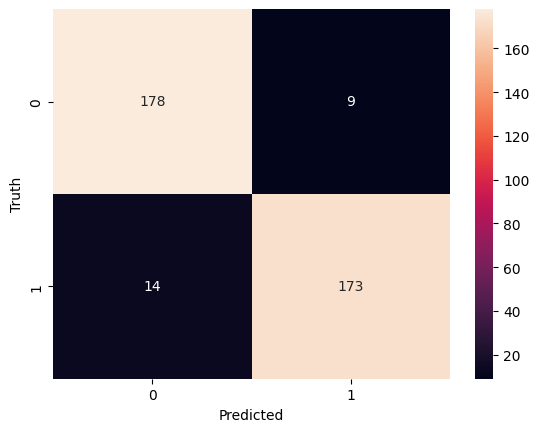

In [61]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       187
           1       0.95      0.93      0.94       187

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



In [71]:
reviews = [
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
pre=model.predict(reviews)
pre=pre.flatten()
pre=np.where(pre>0.5,1,0)

for index,element in enumerate(pre):
  if element==1:
    print(f"line {index} is spam")
  else:
    print(f"line {index} is not spam")


1/1 [==============================] - 0s 85ms/step
line 0 is spam
line 1 is spam
line 2 is spam
line 3 is not spam
line 4 is not spam
